Loading libraries

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('winequality-red.csv',parse_dates=True)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
## number of rows and columns 
df.shape

(1599, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



##### Target variable 
-  `quality`

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

- quality of redwine is numbers from 3 to 8
- 8 being the best, 3 being worst

#### Quality of Data

<AxesSubplot:>

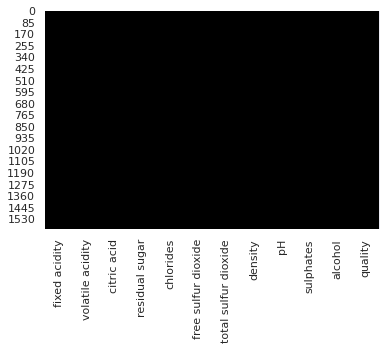

In [21]:
## Checking for null values 
sns.heatmap(df.isnull(), cbar=False, cmap='gray' )

- No missing data.

##### Plots on numerical features to check correlation among properties


<AxesSubplot:>

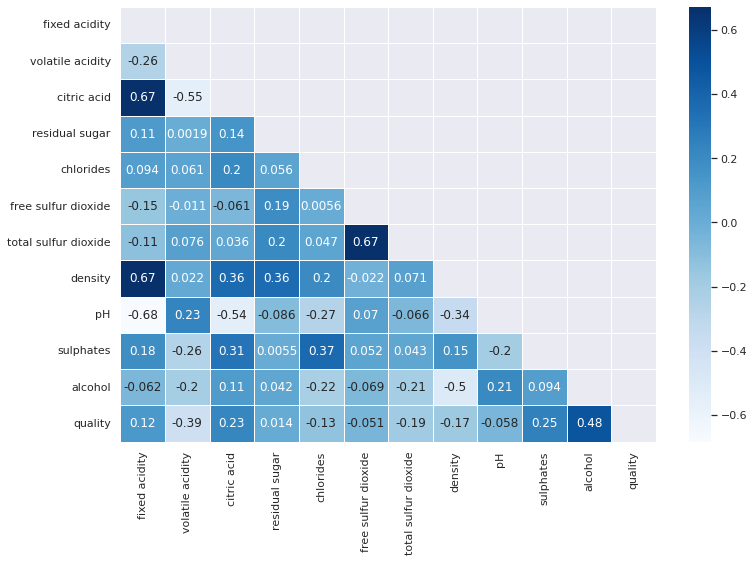

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5)

- No significant correlation among the physicochemical properties of the wine observed

<AxesSubplot:ylabel='quality'>

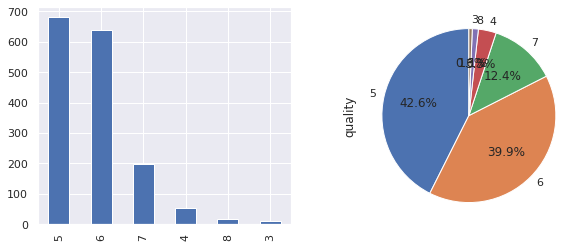

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['quality'].value_counts().plot(kind='bar', ax=axs[0])
df['quality'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

 `Comment`  - The target value quality results in range from 3 to 8
            - Most of the wines are of moderate quality ~82% (5 - 42.6%, 6 - 39.9%)
            
 let's look at each property separately

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

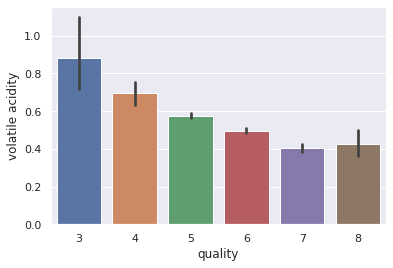

In [30]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)



- volatile acidity is around 0.4 for the best quality.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

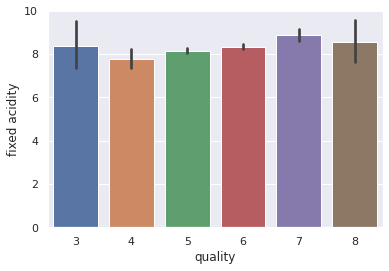

In [31]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

- fixed acidity has minimal impact on quality.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

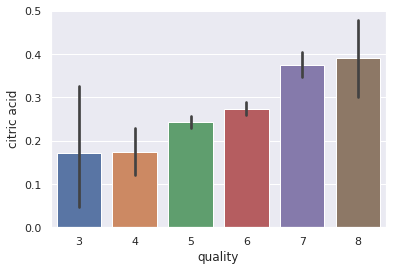

In [7]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

- citric acidity is above ~0.35 for best quality 

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

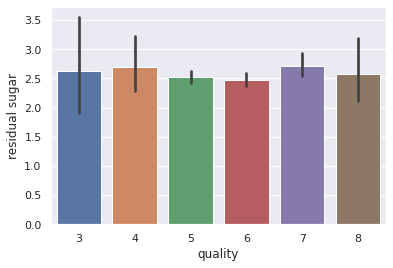

In [9]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

- There is not much impact of residual sugar on the quality of red wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

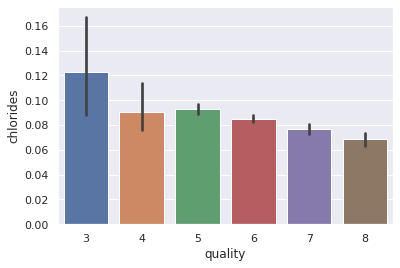

In [10]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

- wine quality is best when chlorides content is least (~0.06)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

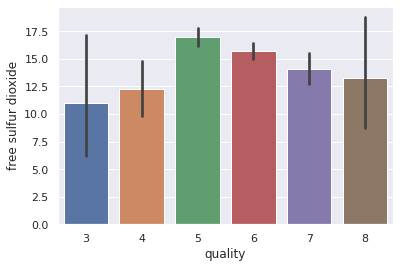

In [11]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

- the amount of free sulfur dioxide is in range ( 12.5 - 15.0 )

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

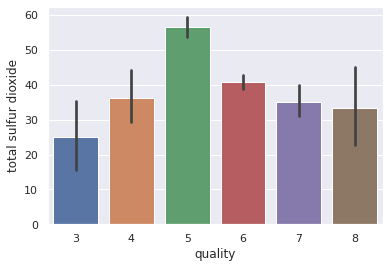

In [13]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

- the amount of total sulfur dioxide is in range ( 30 - 35 )

<AxesSubplot:xlabel='quality', ylabel='density'>

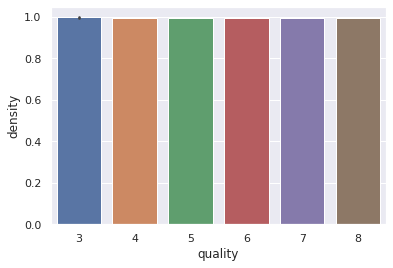

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = df)

- density has no impact on quality 

<AxesSubplot:xlabel='quality', ylabel='pH'>

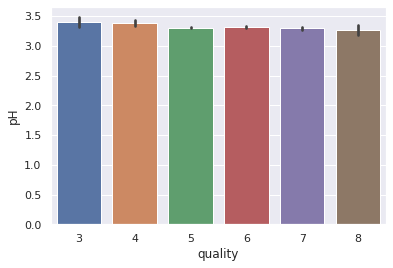

In [16]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pH', data = df)

- pH value is similar for every wine quality rating 

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

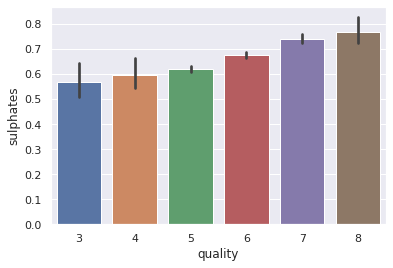

In [18]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

- when amount of sulphate is above 0.7 , better is the quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

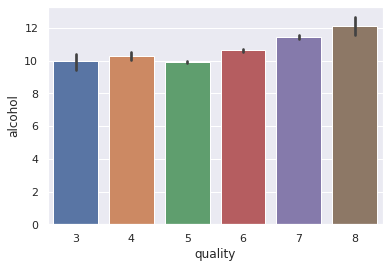

In [19]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

- when amount of alcohol is around 12 best is the wine quality.

##### `Summary`

- below prpoperties have significant impact on quality of red wine as the dataset suggests
1. volatile acidity is around 0.4 
2. citric acidity is above ~0.35
3. chlorides are least ~0.06
4. free sulphur dioxide is in range 12.5 - 15.0
5. total sulphur dioxide is in range 30 - 35
6. sulphates is above 0.7
7. alcohol is around 12

- below properties have least impact or are similar for each quality of wine
1. fixed acidity level
2. residual sugar
3. density
4. pH 

